## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plotnine import *
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [18]:
df = pd.read_csv('/Users/benji/Documents/Machine Learning/Data/ha_1.csv')

In [19]:
df.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [20]:
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

# Select only 'age' and 'chol' as predictors
X = df[['age', 'chol']]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Check the model coefficients
logreg_coef = lr.coef_[0]
logreg_intercept = lr.intercept_[0]
print("Coefficients:", logreg_coef)
print("Intercept:", logreg_intercept)

Coefficients: [0.04477063 0.00283207]
Intercept: -3.3352343331261274


ChatGPT was used to debug the code and understand how to do the part two and three.

In [22]:
age = 55

# For 50% probability (log-odds = 0)
logit_50 = 0

# Calculate cholesterol needed for a 50% probability
chol_50 = (logit_50 - logreg_intercept - logreg_coef[0] * age) / logreg_coef[1]
print(f"Cholesterol needed for 50% chance of heart disease: {chol_50:.2f}")

# For 90% probability
prob_90 = 0.90
logit_90 = np.log(prob_90 / (1 - prob_90))

# Calculate cholesterol needed for a 90% probability
chol_90 = (logit_90 - logreg_intercept - logreg_coef[0] * age) / logreg_coef[1]
print(f"Cholesterol needed for 90% chance of heart disease: {chol_90:.2f}")

Cholesterol needed for 50% chance of heart disease: 308.20
Cholesterol needed for 90% chance of heart disease: 1084.04


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Get the coefficients and intercept from the LDA model
lda_coef = lda.coef_[0] 
lda_intercept = lda.intercept_[0] 


chol_required = (-lda_intercept - lda_coef[0] * age) / lda_coef[1]
print(f"Cholesterol needed for a 55-year-old to be predicted as having heart disease: {chol_required:.2f}")

Cholesterol needed for a 55-year-old to be predicted as having heart disease: 310.01


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [24]:
svc = SVC(kernel='linear')

# Use GridSearchCV to find the best regularization parameter C
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best C parameter from the grid search
best_C = grid_search.best_params_['C']
print(f"Best C: {best_C}")


Best C: 0.01


In [25]:
# Fit the model with the best C
best_svc = grid_search.best_estimator_

# Get the coefficients (weights) and intercept
svc_coef = best_svc.coef_[0] 
svc_intercept = best_svc.intercept_[0] 

chol_required = (-svc_intercept - svc_coef[0] * age) / svc_coef[1]
print(f"Cholesterol needed for a 55-year-old to be predicted as having heart disease: {chol_required:.2f}")

Cholesterol needed for a 55-year-old to be predicted as having heart disease: 286.45


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

ChatGPT was used to understand and write the following code.

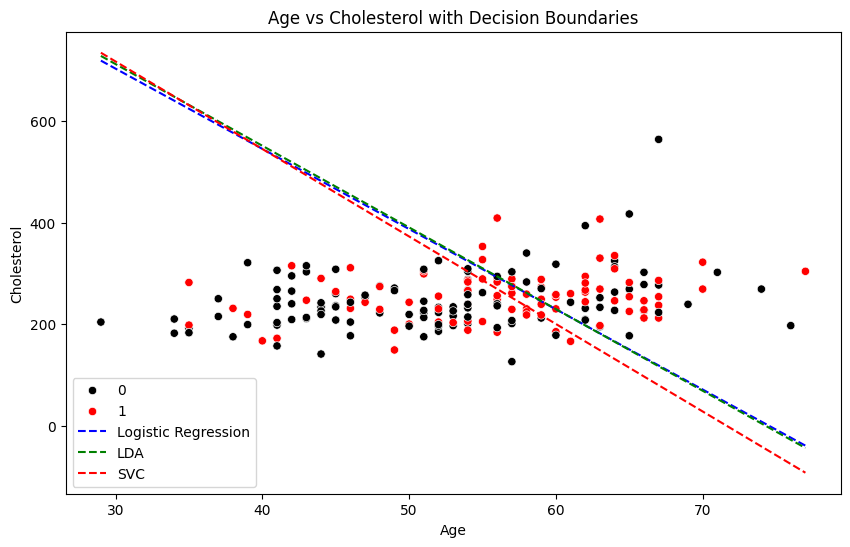

In [36]:
import seaborn as sns
def decision_boundary_line(coef, intercept):
    # Range of age for the plot (e.g., from 40 to 70)
    age_range = np.linspace(df['age'].min(), df['age'].max(), 100)
    chol_boundary = (-intercept - coef[0] * age_range) / coef[1]
    return age_range, chol_boundary

# Calculate decision boundaries
age_range_logreg, chol_boundary_logreg = decision_boundary_line(logreg_coef, logreg_intercept)
age_range_lda, chol_boundary_lda = decision_boundary_line(lda_coef, lda_intercept)
age_range_svc, chol_boundary_svc = decision_boundary_line(svc_coef, svc_intercept)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', hue='diagnosis', data=df, palette={0: 'black', 1: 'red'})

# Plot the decision boundaries for each model
plt.plot(age_range_logreg, chol_boundary_logreg, label='Logistic Regression', linestyle='--', color='blue')
plt.plot(age_range_lda, chol_boundary_lda, label='LDA', linestyle='--', color='green')
plt.plot(age_range_svc, chol_boundary_svc, label='SVC', linestyle='--', color='red')

plt.title('Age vs Cholesterol with Decision Boundaries')
plt.xlabel('Age')
plt.ylabel('Cholesterol')


plt.legend()
plt.show()